In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


#**Data_Overview**



In [4]:
data = pd.read_csv("winequalityN.csv")
data.describe()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,3249.000000,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1875.666681,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1625.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,4873.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,6497.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
data.head()

,id,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.shape

(6497, 14)

In [ ]:
data.columns

Index(['id', 'type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

# **Data Preproseccing**

Handeling non-numeric values


In [ ]:
x_full= pd.read_csv("/content/drive/MyDrive/MachineLearningProject/winequalityN.csv",index_col="id")
x_full_encoded = pd.get_dummies(x_full,columns =['type'],prefix=['type'])


In [ ]:
x_full_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
id,,,,,,,,,,,,,,
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


Handeling missing values

In [ ]:
missing_values = x_full_encoded.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_x= pd.DataFrame(my_imputer.fit_transform(x_full_encoded))
# Imputation removed column names; put them back
imputed_x.columns = x_full_encoded.columns

In [ ]:
missing_values = imputed_x.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [ ]:
x_final=imputed_x

Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_need_scaling = [x for x in x_final.columns if x !="quality"]
x_final[columns_need_scaling] = scaler.fit_transform(x_final[columns_need_scaling])

In [ ]:
x_final.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,6.0,0.0,1.0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,6.0,0.0,1.0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,6.0,0.0,1.0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6.0,0.0,1.0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6.0,0.0,1.0


Plots

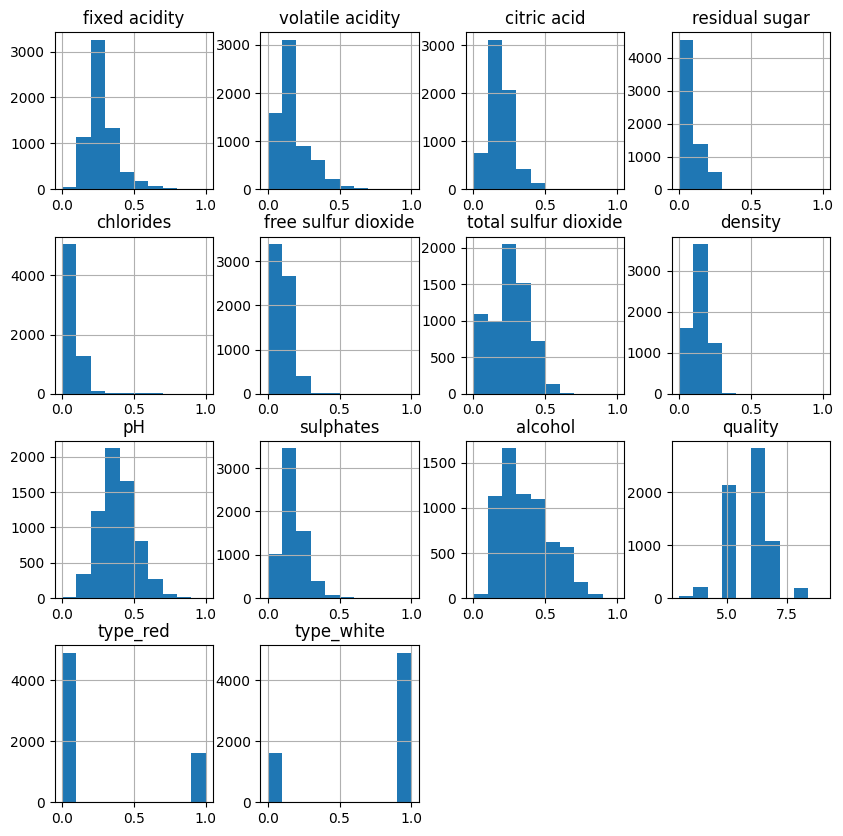

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:378: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


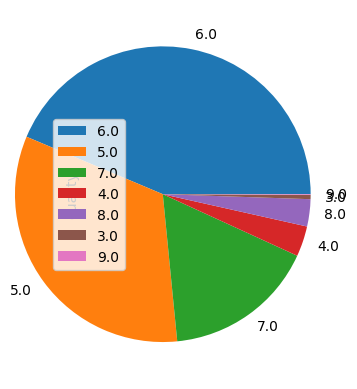

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each numeric features
x_final.hist(figsize=(10,10))
plt.show()


# Pie Chart
x_final['quality'].value_counts().plot(kind='pie')


sns.violinplot(x='type_white', y='quality', data=x_final)
plt.show()

Oversampling

In [ ]:
x_final["quality"].value_counts()

6.0    2836
5.0    2138
7.0    1079
4.0     216
8.0     193
3.0      30
9.0       5
Name: quality, dtype: int64

In [ ]:
import pandas as pd

# Filter unique values of the target variable 'quality'
valid_classes = [x for x in x_final["quality"].unique() if x in [6, 5, 7]]

# Create DataFrame 'df_whole' containing only the valid classes
df_whole = x_final[x_final['quality'].isin(valid_classes)]

df_whole.quality.unique()

array([6., 5., 7.])

In [ ]:
count_class_9, count_class_3, count_class_4, count_class_8 = 5, 30, 216, 193
count_class_7 = 1079

valid_classes = [x for x in x_final["quality"].unique() if x in [6, 5, 7]]
df_whole = x_final[x_final['quality'].isin(valid_classes)]

df_class_9 = x_final[x_final["quality"] == 9]
df_class_3 = x_final[x_final["quality"] == 3]
df_class_4 = x_final[x_final["quality"] == 4]
df_class_8 = x_final[x_final["quality"] == 8]
df_class=[df_class_9,df_class_3,df_class_4,df_class_8]

for df in df_class:
  df_over_n = df.sample(count_class_7, replace = True)
  df_whole = pd.concat([df_whole, df_over_n], axis = 0)

In [ ]:
df_whole.quality.value_counts()
x_final=df_whole

<Axes: ylabel='quality'>

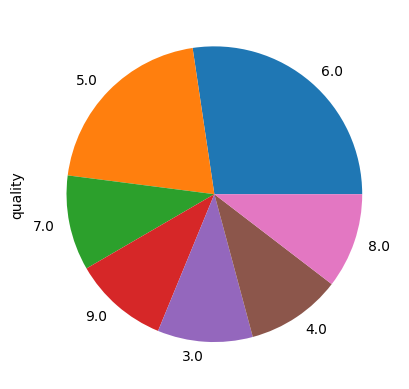

In [ ]:

x_final['quality'].value_counts().plot(kind='pie')


# Train & Test

In [ ]:
x=x_final.drop("quality",axis=1)
y=x_final["quality"]
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, random_state=11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model =DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
print(tree_model.score(x_valid, y_valid))

0.7719382835101254


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model =DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
print(tree_model.score(x_valid, y_valid))

0.8817966094662564


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=1000,max_features=1)
forest_model.fit(x_train, y_train)

print(forest_model.score(x_valid, y_valid))

0.8413693346190936


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=1000,max_features=1)
forest_model.fit(x_train, y_train)

print(forest_model.score(x_valid, y_valid))

0.9554388041969005


# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

grid={'n_estimators': [int(x) for x in range(100,1000,100)],
      'max_depth':[int(x) for x in range(10,20,1)],
      'max_features': [int(x) for x in range(1,15)]
      }
# Initialize GridSearchCV
MS = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid=grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1,
                  verbose=2)

# Fit the GridSearchCV to the data
H = MS.fit(x, y)

# Get the best parameters from the GridSearchCV
best_params = H.best_params_


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

grid={'n_estimators': [int(x) for x in range(100,1000,100)],
      'max_depth':[int(x) for x in range(15,20,1)],
      'max_features': [1,'sqrt']
      }
# Initialize GridSearchCV
MS = GridSearchCV(estimator=RandomForestRegressor(),
                  param_grid=grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1,
                  verbose=2)

# Fit the GridSearchCV to the data
H = MS.fit(x, y)

# Get the best parameters from the GridSearchCV
best_params = H.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
print(best_params)
M = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                           max_depth=best_params['max_depth'],
                           max_features=best_params['max_features'],
                           )

# Fit the RandomForestClassifier to the data
M.fit(x, y)

In [ ]:
print(best_params)
M = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                           max_depth=best_params['max_depth'],
                           max_features=best_params['max_features'],
                           )

# Fit the RandomForestClassifier to the data
M.fit(x, y)

In [ ]:
M.score(x_train, y_train)

0.9990355635925257

In [ ]:
M.score(x_valid,y_valid)